In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/driver')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/driver


In [ ]:
#mounted google drive
from google.colab import drive
drive.mount('/content/driver')

Drive already mounted at /content/driver; to attempt to forcibly remount, call drive.mount("/content/driver", force_remount=True).


In [ ]:
#Read infosys dataset
df=pd.read_csv('/content/driver/My Drive/info1.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/27/2018,625.50,641.00,625.30,638.90,615.69,12285851
1,11/28/2018,640.95,668.70,640.00,666.40,642.19,17719890
2,11/29/2018,671.00,674.90,658.80,661.05,637.03,13399070
3,11/30/2018,661.00,672.00,660.95,667.45,643.20,10445773
4,12/3/2018,673.15,679.00,665.95,670.35,645.99,8260890
...,...,...,...,...,...,...,...
237,11/21/2019,715.50,721.45,710.50,713.25,713.25,9692973
238,11/22/2019,711.75,712.00,685.10,693.20,693.20,14415826
239,11/25/2019,693.35,705.15,693.20,698.10,698.10,7334511
240,11/26/2019,705.00,707.25,686.00,690.60,690.60,27252999


In [ ]:
#for data cleaning
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

Text(0.5, 1.0, 'Infosys stock data')

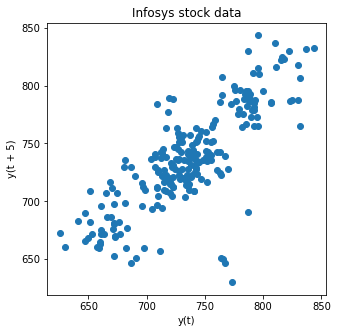

In [ ]:
#plotting lag plot to see if dataset is stationary or not
plt.figure(figsize=(5,5))#to set the size of figure
lag_plot(df['Open'],lag=5)
plt.title("Infosys stock data")

In [ ]:
a=int(len(df)*0.8)
a

193

In [ ]:
#splitting into training and testing dataset
train_set,test_set=df[0:a],df[a:]
train_set

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/27/2018,625.50,641.00,625.30,638.90,615.69,12285851
1,11/28/2018,640.95,668.70,640.00,666.40,642.19,17719890
2,11/29/2018,671.00,674.90,658.80,661.05,637.03,13399070
3,11/30/2018,661.00,672.00,660.95,667.45,643.20,10445773
4,12/3/2018,673.15,679.00,665.95,670.35,645.99,8260890
...,...,...,...,...,...,...,...
188,9/6/2019,843.30,847.00,835.05,840.15,821.06,6106841
189,9/9/2019,836.80,840.30,827.55,829.10,810.26,4377870
190,9/11/2019,822.30,828.55,814.15,820.10,801.47,7981036
191,9/12/2019,816.40,819.85,810.85,816.40,797.85,4400017


([<matplotlib.axis.XTick at 0x7f9c53538588>,
 [Text(0, 0, '11/27/2018'),
  Text(0, 0, '1/2/2019'),
  Text(0, 0, '2/6/2019'),
  Text(0, 0, '3/15/2019'),
  Text(0, 0, '4/30/2019'),
  Text(0, 0, '6/6/2019'),
  Text(0, 0, '7/11/2019'),
  Text(0, 0, '8/19/2019'),
  Text(0, 0, '9/25/2019'),
  Text(0, 0, '11/4/2019')])

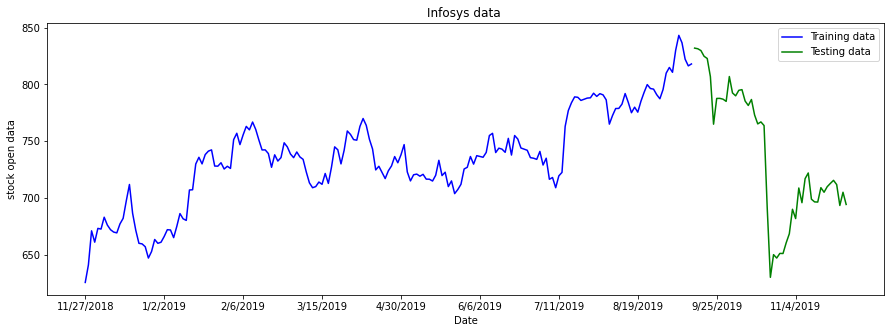

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Infosys data ")
plt.xlabel("Date")
plt.ylabel("stock open data")
plt.plot(train_set['Open'],color='blue',label='Training data')
plt.plot(test_set['Open'],color='green',label='Testing data')
plt.legend()
plt.xticks(np.arange(0,241,25),df['Date'][0:241:25])

In [ ]:
#defining a function for checking error
def smape(y_true,y_pred):
    return np.mean((np.abs(y_true-y_pred)*200/(np.abs(y_true)+np.abs(y_pred))))

In [ ]:
#SARIMA model
train_val=train_set['Open'].values
test_val=test_set['Open'].values
history=[x for x in train_val]
print(type(history))#this is list of training data
prediction=list()
prediction
for t in range(len(test_val)):
    model=SARIMAX(history,order=(3,1,0),seasonal_order=(3,1,0,24))
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()
    yhat=output[0]
    prediction.append(yhat)
    obs=test_val[t]
    history.append(obs)
error=np.sqrt(mean_squared_error(test_val,prediction))
print(" Root Mean squared error : %0.3f",error)
error2=smape(test_val,prediction)
print("Symmetric mean absolute percentage error: %0.3f",error2)


<class 'list'>
 Root Mean squared error : %0.3f 20.10446566318669
Symmetric mean absolute percentage error: %0.3f 1.824500261572836


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  241
Model:             SARIMAX(3, 1, 0)x(3, 1, 0, 24)   Log Likelihood                -867.697
Date:                            Tue, 19 May 2020   AIC                           1749.394
Time:                                    15:40:12   BIC                           1773.021
Sample:                                         0   HQIC                          1758.939
                                            - 241                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0924      0.045      2.039      0.041       0.004       0.181
ar.L2         -0.0784      0.078     -1.009      0.313      -0.231       0.074
ar.L3          0.0122      0.106      0.116      0.908      -0.195       0.219
ar.S.L24      -0.7448      0.060    -12.457      0.000      -0.862      -0.628
ar.S.L48      -0.4673      0.106     -4.393      0.000      -0.676      -0.259
ar.S.L72      -0.1538      0.122     -1.265      0.206      -0.392       0.084
sigma2       168.0596      9.933     16.919      0.000     148.591     187.529
===================================================================================
Ljung-Box (Q):                       36.42   Jarque-Bera (JB):               417.91
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               2.19   Skew:                            -1.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df1=pd.DataFrame({'Actual':test_val,'Predicted':prediction})
df1

,Actual,Predicted
0,832.05,816.440105
1,831.50,838.977863
2,829.90,828.068235
3,824.85,830.392739
4,822.90,820.801528
5,806.90,822.729014
6,765.00,804.945773
7,787.70,778.156935
8,787.75,794.674312
9,787.05,787.357751


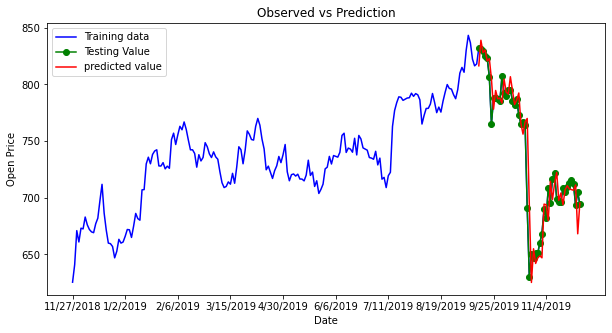

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Observed vs Prediction")
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.plot(df['Open'],color='blue',label='Training data')
plt.plot(test_set.index,test_set['Open'],'green',marker='o',label='Testing Value')#since training and testing was overlapping therfore marker was used
plt.plot(test_set.index,prediction,'red',label='predicted value')
plt.xticks(np.arange(0,241,25), df['Date'][0:241:25])
plt.legend()

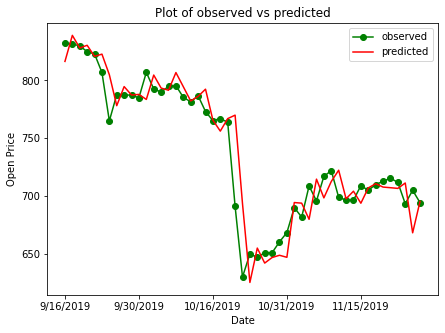

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Plot of observed vs predicted")
plt.xlabel("Date")
plt.ylabel('Open Price')
plt.plot(test_set.index,test_val,"green",label="observed",marker='o')
plt.plot(test_set.index,prediction,"red",label="predicted")
plt.xticks(np.arange(193,242,10),df['Date'][193:242:10])
plt.legend()